## DATA EXPLORATION AND VISUALIZATION FOR FIT PREDICTION

### NAME: Priyanka Raju
### SJSU ID: 013839865

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from dython import nominal
import warnings

### ModCloth Data Exploration & Visualization

In [3]:
df_modcloth = pd.read_json('modcloth_final_data.json', lines=True)

In [4]:
df_modcloth.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [4]:
df_modcloth['bra size'].sort_values(ascending=True).unique()

array([28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., nan])

In [5]:
df_modcloth['bust'].sort_values(ascending=True).unique()

array(['20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '37-39', '38', '39', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', nan], dtype=object)

In [6]:
df_modcloth['category'].sort_values(ascending=True).unique()

array(['bottoms', 'dresses', 'new', 'outerwear', 'sale', 'tops',
       'wedding'], dtype=object)

In [7]:
df_modcloth['cup size'].sort_values(ascending=True).unique()

array(['a', 'aa', 'b', 'c', 'd', 'dd/e', 'ddd/f', 'dddd/g', 'h', 'i', 'j',
       'k', nan], dtype=object)

In [8]:
df_modcloth['fit'].sort_values(ascending=True).unique()

array(['fit', 'large', 'small'], dtype=object)

In [9]:
df_modcloth['height'].sort_values(ascending=True).unique()

array(['3ft', '3ft 11in', '3ft 2in', '3ft 3in', '3ft 4in', '3ft 6in',
       '4ft 10in', '4ft 11in', '4ft 2in', '4ft 4in', '4ft 5in', '4ft 6in',
       '4ft 7in', '4ft 8in', '4ft 9in', '5ft', '5ft 10in', '5ft 11in',
       '5ft 1in', '5ft 2in', '5ft 3in', '5ft 4in', '5ft 5in', '5ft 6in',
       '5ft 7in', '5ft 8in', '5ft 9in', '6ft', '6ft 1in', '6ft 2in',
       '6ft 3in', '6ft 4in', '6ft 5in', '6ft 6in', '6ft 7in', '6ft 8in',
       '7ft 11in', '7ft 3in', '7ft 5in', '7ft 6in', '7ft 7in', nan],
      dtype=object)

In [10]:
df_modcloth['hips'].sort_values(ascending=True).unique()

array([30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., nan])

In [11]:
df_modcloth['length'].sort_values(ascending=True).unique()

array(['just right', 'slightly long', 'slightly short', 'very long',
       'very short', nan], dtype=object)

In [12]:
df_modcloth['quality'].sort_values(ascending=True).unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [13]:
df_modcloth['shoe size'].sort_values(ascending=True).unique()

array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5, 11. , 11.5, 38. ,  nan])

In [14]:
df_modcloth['shoe width'].sort_values(ascending=True).unique()

array(['average', 'narrow', 'wide', nan], dtype=object)

In [15]:
df_modcloth['size'].sort_values(ascending=True).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       18, 20, 21, 24, 25, 26, 27, 30, 31, 32, 33, 38])

In [16]:
df_modcloth['waist'].sort_values(ascending=True).unique()

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45.,
       46., 47., 48., 49., 50., nan])

### Converting the fit class from categorical to numerical

In [5]:
def fit_to_numeric(fit):
    if fit=='small':
        return 1
    if fit=='fit':
        return 2
    if fit=='large':
        return 3

df_modcloth['fit_to_numeric'] = df_modcloth['fit'].apply(fit_to_numeric)

### Converting the height attribute to cms

In [6]:
def get_height_in_cms(height):
    if type(height) == type(1.0):
        return
    try: 
        h_inch = int(height[4:-2])
        h_inch += int(height[0]) * 12
        h_cm = round(h_inch * 2.54, 1)        
        return h_cm
    except:
        return (int(height[0]) * 12 * 2.54)

df_modcloth['height_cms'] = df_modcloth['height'].apply(get_height_in_cms)

### Statistical discription for the dataset

In [19]:
df_modcloth.describe()

,bra size,hips,item_id,quality,shoe size,size,user_id,waist,fit_to_numeric,height_cms
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000,82790.000000,81683.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223,2.001027,165.472466
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849,0.560757,7.244209
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000,1.000000,91.440000
25%,34.000000,36.000000,314980.000000,3.000000,7.000000,8.000000,252897.750000,28.000000,2.000000,160.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000,2.000000,165.100000
75%,38.000000,43.000000,658440.000000,5.000000,9.000000,15.000000,744745.250000,34.000000,2.000000,170.200000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000,3.000000,241.300000


In [20]:
df_modcloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 20 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null object
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
fit_to_numeric    82790 non-null int64
height_cms        81683 non-null float64
dtypes: float64(6), int64(4), object(10)
memory usage: 12.6+ MB


In [21]:
pd.DataFrame({'Count of missing values': df_modcloth.isnull().sum(),'Percentage of missing values': df_modcloth.isnull().mean().round(4) * 100,
              'Data Type': df_modcloth.dtypes})

,Count of missing values,Percentage of missing values,Data Type
bra size,6018,7.27,float64
bust,70936,85.68,object
category,0,0.00,object
cup size,6255,7.56,object
fit,0,0.00,object
height,1107,1.34,object
hips,26726,32.28,float64
item_id,0,0.00,int64
length,35,0.04,object
quality,68,0.08,float64


#### Correlation between numerical data types with respect to target fit can be analysed by the below correlation map. The variation in color of the map indicates hoe positvely or negatively features are correlated with each other.

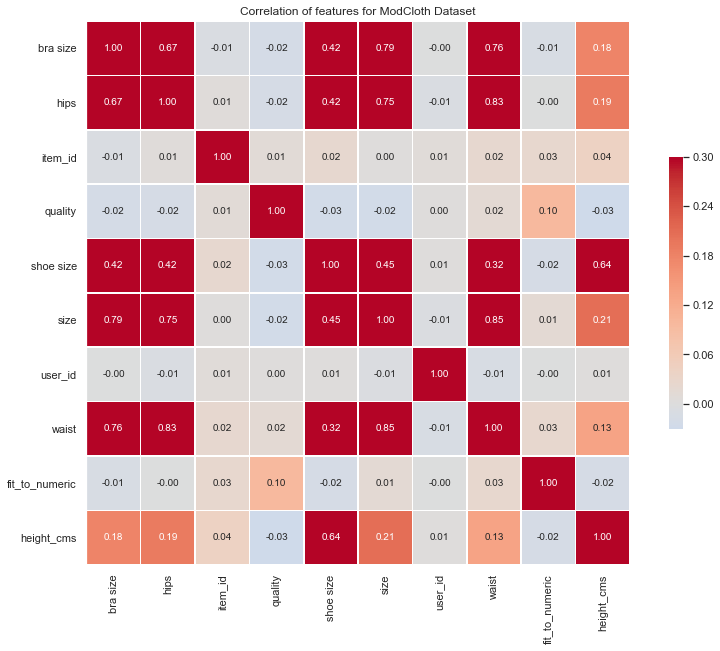

In [22]:
g = sns.heatmap(df_modcloth.corr(),  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
plt.title('Correlation of features for ModCloth Dataset')
plt.show()

#### Correlation between categorical data types with respect to target fit can be analysed by the below correlation map

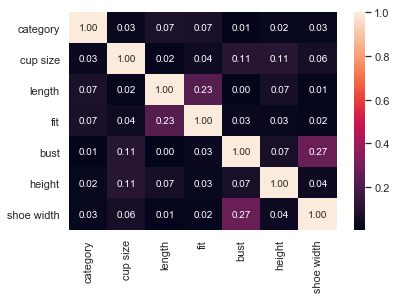

In [23]:
warnings.filterwarnings("ignore")
nominal.associations(df_modcloth[['category','cup size','length','fit','bust','height','shoe width']], nominal_columns='all')

### Our target is to predict the Fit of the user/customer.
### We can see the below distribution of the dataset features with respect to the target variable Fit

#### 1. Distribution of data with respect to the feature- 'height'

In [24]:
df_modcloth = df_modcloth[pd.notnull(df_modcloth['height_cms'])]

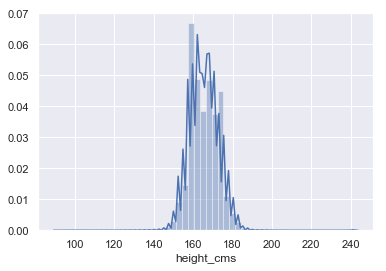

In [25]:
ax = sns.distplot(df_modcloth['height_cms'])

##### It shows the majority of users height is in the range between 140 cms to 180 cms

#### 2. Distribution of data with respect to the feature - 'bra size'
#### The bra size entered by the customers range between 30 to 45

In [26]:
df_modcloth = df_modcloth[pd.notnull(df_modcloth['bra size'])]

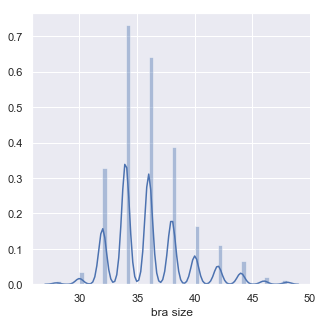

In [27]:
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.distplot(df_modcloth['bra size'])

#### 3. Distribution of data with respect to the feature- 'hips'
#### The hi measurements of the customer fall under the range of 30 to 60 with maximum lying between 35 to 45

In [28]:
df_modcloth = df_modcloth[pd.notnull(df_modcloth['hips'])]

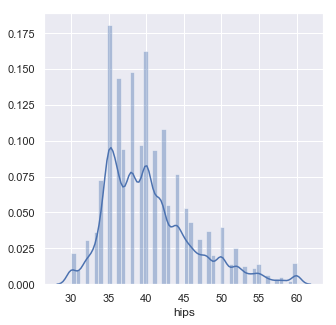

In [29]:
ax = sns.distplot(df_modcloth['hips'])

#### 4. Distribution of 'fit' with respect to the feature- 'quality'
#### Customers have provided good feedback on the quality of product irrespective of the fit to the customer

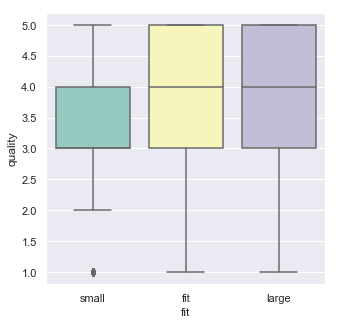

In [30]:
ax = sns.boxplot(x="fit", y="quality", data=df_modcloth, palette="Set3")

#### Customers ratings towards the quality of product lies more towards the fit class of 'Fit' and 'Large'

#### 4. Distribution of 'fit' with respect to the feature- 'category'
#### Distribution of data is centered more towards the 'Fit'

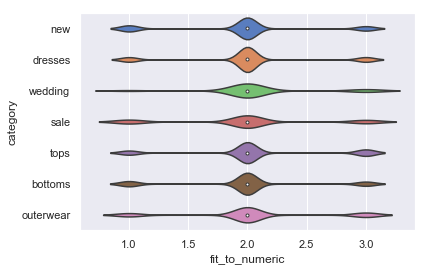

In [10]:
ax = sns.violinplot(x="fit_to_numeric", y="category",data=df_modcloth, palette="muted")

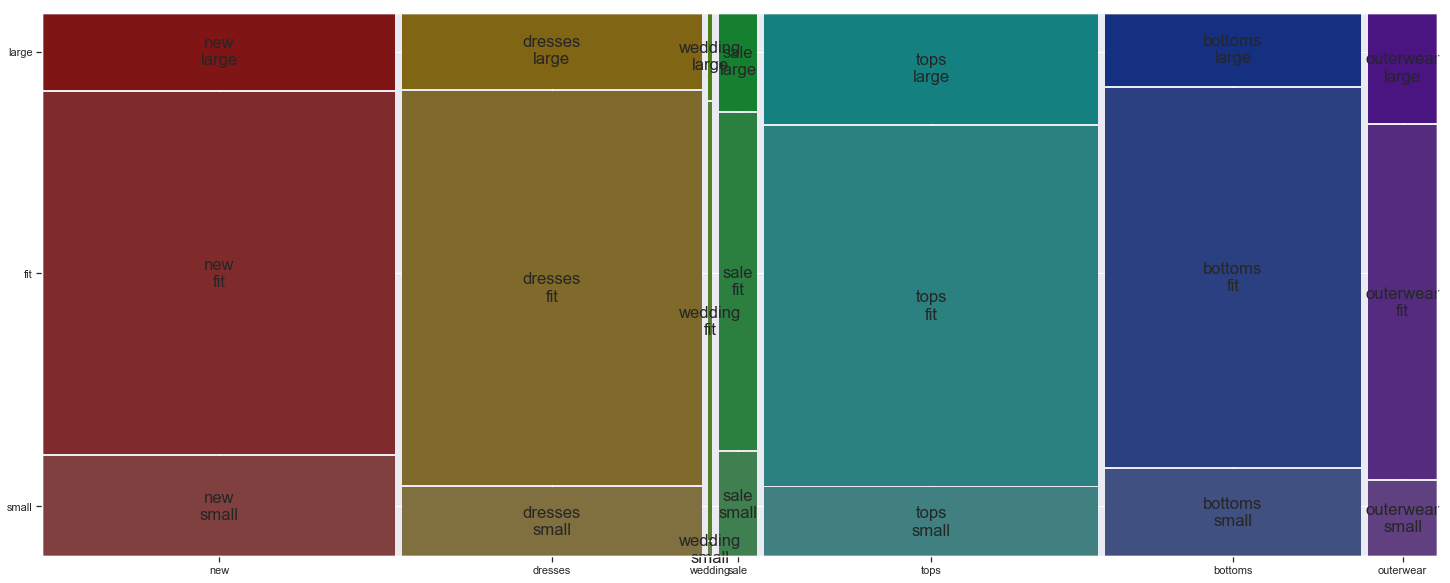

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams['font.size'] = 20.0
mosaic(df_modcloth, ['category', 'fit']);

#### Majority of the category shopped by the customers have the fit class to be the maximum when compared to the other small or large class

#### 5. We can visualize the distribution of how the customers have rated the quality of item based on the category purchased and notice that the category 'wedding' has been rated more positively

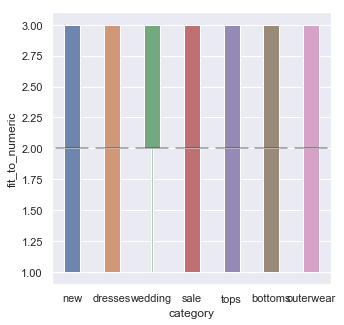

In [33]:
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.boxenplot(x="category", y="fit_to_numeric", data=df_modcloth)

#### 6. We can also note the variation in size of the product with repsect to the 'Fit'.
#### The sizes purchased by the customers seems to be more varying betweenn the three classes of fit for the size of products between 0 to 20. There is equal proportion of the product being fit and returns of products due to being small/large.

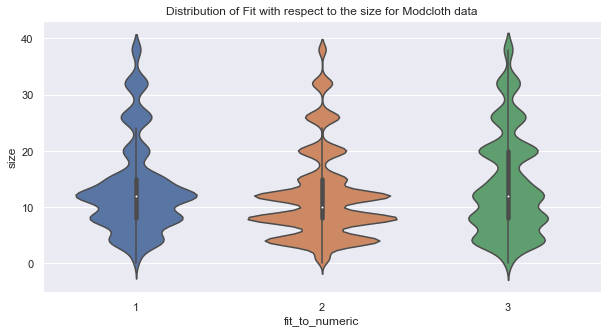

In [34]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of Fit with respect to the size for Modcloth data')
ax = sns.violinplot(x="fit_to_numeric", y="size", data=df_modcloth)

#### 7. We can visualize the distribution of  fit with respect to the size of item and length of the item for each customer  

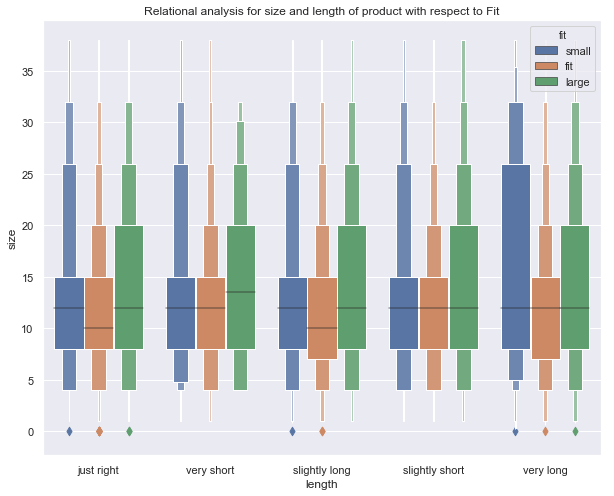

In [35]:
plt.rcParams["figure.figsize"] = (10,8)
plt.title('Relational analysis for size and length of product with respect to Fit')
ax = sns.boxenplot(x="length", y="size",hue="fit", data=df_modcloth)

#### Distribution of size

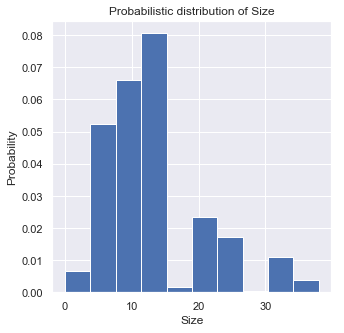

In [36]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(df_modcloth['size'], density=1, bins=10)
plt.xlabel('Size')
plt.ylabel('Probability')
plt.title('Probabilistic distribution of Size')
plt.show()

### Pie chart representation of Fit

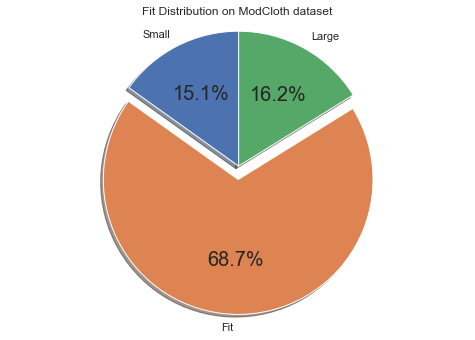

In [37]:
lenSmall = len(df_modcloth[df_modcloth['fit'] == 'small'])
lenFit = len(df_modcloth[df_modcloth['fit'] == 'fit'])
lenLarge = len(df_modcloth[df_modcloth['fit'] == 'large'])

labels = ['Small', 'Fit', 'Large']
sizes = [lenSmall, lenFit, lenLarge]
plt.rcParams["figure.figsize"] = (7,5)
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Fit Distribution on ModCloth dataset')
plt.show()

### Rent the Runway Data Exploration and Visualization

In [38]:
df_rent = pd.read_json('renttherunway_final_data.json', lines=True)

In [39]:
df_rent.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [40]:
df_rent['body type'].unique()

array(['hourglass', 'straight & narrow', nan, 'pear', 'athletic',
       'full bust', 'petite', 'apple'], dtype=object)

In [41]:
df_rent['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

In [42]:
df_rent['fit'].unique()

array(['fit', 'small', 'large'], dtype=object)

In [43]:
df_rent['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [44]:
df_rent['size'].sort_values(ascending=True).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52,
       54, 55, 56, 57, 58])

In [45]:
df_rent['bust size'].sort_values(ascending=True).unique()

array(['28a', '28aa', '28b', '28c', '28d', '28dd', '28ddd/e', '28f',
       '28g', '28h', '28i', '30a', '30aa', '30b', '30c', '30d', '30dd',
       '30ddd/e', '30f', '30g', '30h', '30i', '32a', '32aa', '32b', '32c',
       '32d', '32d+', '32dd', '32ddd/e', '32f', '32g', '32h', '32i',
       '32j', '34a', '34aa', '34b', '34c', '34d', '34d+', '34dd',
       '34ddd/e', '34f', '34g', '34h', '34i', '34j', '36a', '36aa', '36b',
       '36c', '36d', '36d+', '36dd', '36ddd/e', '36f', '36g', '36h',
       '36i', '36j', '38a', '38aa', '38b', '38c', '38d', '38d+', '38dd',
       '38ddd/e', '38f', '38g', '38h', '38i', '38j', '40b', '40c', '40d',
       '40dd', '40ddd/e', '40f', '40g', '40h', '40i', '40j', '42b', '42c',
       '42d', '42dd', '42ddd/e', '42f', '42g', '42h', '42j', '44b', '44c',
       '44d', '44dd', '44ddd/e', '44f', '44g', '44h', '46c', '46ddd/e',
       '46f', '48d', '48dd', nan], dtype=object)

In [46]:
df_rent['weight'].sort_values(ascending=True).unique()

array(['100lbs', '101lbs', '102lbs', '103lbs', '104lbs', '105lbs',
       '106lbs', '107lbs', '108lbs', '109lbs', '110lbs', '111lbs',
       '112lbs', '113lbs', '114lbs', '115lbs', '116lbs', '117lbs',
       '118lbs', '119lbs', '120lbs', '121lbs', '122lbs', '123lbs',
       '124lbs', '125lbs', '126lbs', '127lbs', '128lbs', '129lbs',
       '130lbs', '131lbs', '132lbs', '133lbs', '134lbs', '135lbs',
       '136lbs', '137lbs', '138lbs', '139lbs', '140lbs', '141lbs',
       '142lbs', '143lbs', '144lbs', '145lbs', '146lbs', '147lbs',
       '148lbs', '149lbs', '150lbs', '151lbs', '152lbs', '153lbs',
       '154lbs', '155lbs', '156lbs', '157lbs', '158lbs', '159lbs',
       '160lbs', '161lbs', '162lbs', '163lbs', '164lbs', '165lbs',
       '166lbs', '167lbs', '168lbs', '169lbs', '170lbs', '171lbs',
       '172lbs', '173lbs', '174lbs', '175lbs', '176lbs', '177lbs',
       '178lbs', '179lbs', '180lbs', '181lbs', '182lbs', '183lbs',
       '184lbs', '185lbs', '186lbs', '187lbs', '188lbs', '189l

In [47]:
def get_height_cms(height):
    if type(height) == type(1.0):
        return
    try: 
        h_inch = int(height[3:-1])
        h_inch += int(height[0]) * 12
        h_cm = round(h_inch * 2.54, 1)        
        return h_cm
    except:
        return (int(height[0]) * 12 * 2.54)
df_rent['height_in_cms'] = df_rent['height'].apply(get_height_cms)

In [48]:
df_rent['fit_to_numeric'] = df_rent['fit'].apply(fit_to_numeric)

### Statistical description of dataset

In [49]:
df_rent.describe()

,age,item_id,rating,size,user_id,height_in_cms,fit_to_numeric
count,191584.000000,1.925440e+05,192462.000000,192544.000000,192544.000000,191867.000000,192544.000000
mean,33.871017,1.045684e+06,9.092371,12.245175,499494.100149,165.890406,1.994432
std,8.058083,8.053148e+05,1.430044,8.494877,289059.719328,6.764777,0.512031
min,0.000000,1.233730e+05,2.000000,0.000000,9.000000,137.200000,1.000000
25%,29.000000,1.950760e+05,8.000000,8.000000,250654.250000,160.000000,2.000000
50%,32.000000,9.483960e+05,10.000000,12.000000,499419.000000,165.100000,2.000000
75%,37.000000,1.678888e+06,10.000000,16.000000,750974.000000,170.200000,2.000000
max,117.000000,2.966087e+06,10.000000,58.000000,999997.000000,198.100000,3.000000


In [50]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 17 columns):
age               191584 non-null float64
body type         177907 non-null object
bust size         174133 non-null object
category          192544 non-null object
fit               192544 non-null object
height            191867 non-null object
item_id           192544 non-null int64
rating            192462 non-null float64
rented for        192534 non-null object
review_date       192544 non-null object
review_summary    192544 non-null object
review_text       192544 non-null object
size              192544 non-null int64
user_id           192544 non-null int64
weight            162562 non-null object
height_in_cms     191867 non-null float64
fit_to_numeric    192544 non-null int64
dtypes: float64(3), int64(4), object(10)
memory usage: 25.0+ MB


In [51]:
pd.DataFrame({'Count of missing values': df_rent.isnull().sum(),'Percentage of missing values': df_rent.isnull().mean().round(4) * 100,
              'Data Type': df_rent.dtypes})

,Count of missing values,Percentage of missing values,Data Type
age,960,0.50,float64
body type,14637,7.60,object
bust size,18411,9.56,object
category,0,0.00,object
fit,0,0.00,object
height,677,0.35,object
item_id,0,0.00,int64
rating,82,0.04,float64
rented for,10,0.01,object
review_date,0,0.00,object


#### Correlation between numerical data types with respect to target fit can be analysed by the below correlation map

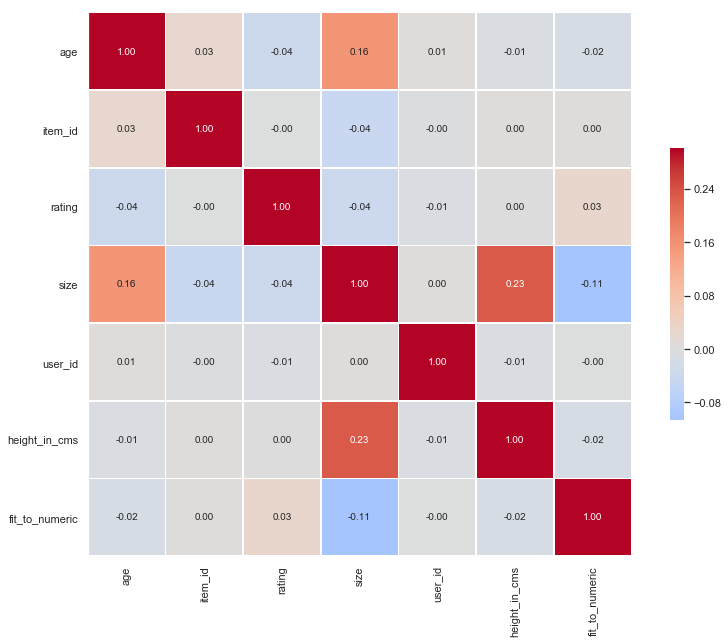

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
corr = df_rent.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

#### Correlation between categorical data types with respect to target fit can be analysed by the below correlation map

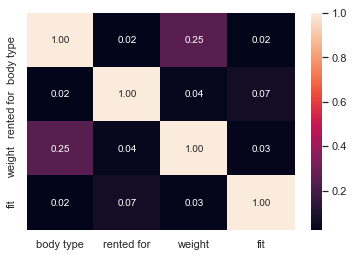

In [53]:
warnings.filterwarnings("ignore")
nominal.associations(df_rent[['body type','rented for','weight','fit']], nominal_columns='all')

### Our target is to predict the Fit of the user/customer.
### We can see the below distribution of the dataset features with respect to the target variable Fit

#### 1. Distribution of data with respect to the feature- 'height'

In [54]:
df_rent = df_rent[pd.notnull(df_rent['height_in_cms'])]

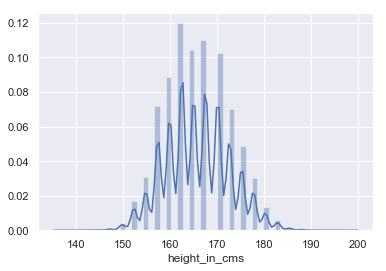

In [55]:
ax = sns.distplot(df_rent['height_in_cms'])

##### It shows the majority of users height is in the range between 140 cms to 180 cms

#### 2. Distribution of data with respect to the feature - 'rating'

In [56]:
df_rent = df_rent[pd.notnull(df_rent['rating'])]

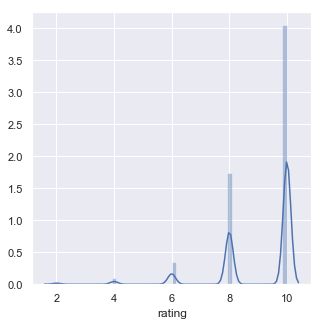

In [57]:
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.distplot(df_rent['rating'])

#### 3. Distribution of 'fit' with respect to the feature- 'rating'
#### Ratings given by the customers to the products rented here are between 8 to 10

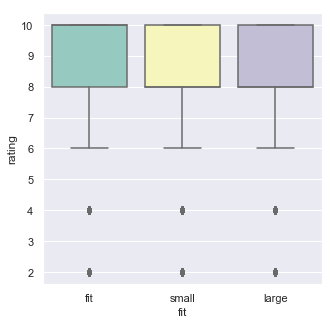

In [58]:
ax = sns.boxplot(x="fit", y="rating", data=df_rent, palette="Set3")

#### 4. We can also note the variation in size of the product with repsect to the 'Fit'.
#### The sizes purchased by the customers seems to be more varying betweenn the three classes of fit for the size of products between 0 to 30. There is equal proportion of the product being fit and returns of products due to being small/large.

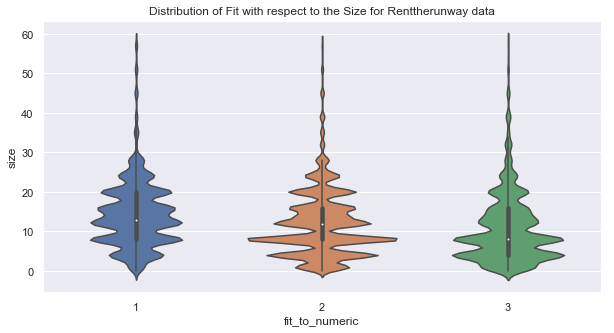

In [59]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of Fit with respect to the Size for Renttherunway data')
ax = sns.violinplot(x="fit_to_numeric", y="size", data=df_rent)

#### 5. We can visualize the distribution of  fit with respect to the size of item and the reaso for renting it out  for each customer.
#### We can notice few customers  have entered extreme/larger values of size that seems to be out of proportion. We can consider removing these instances.

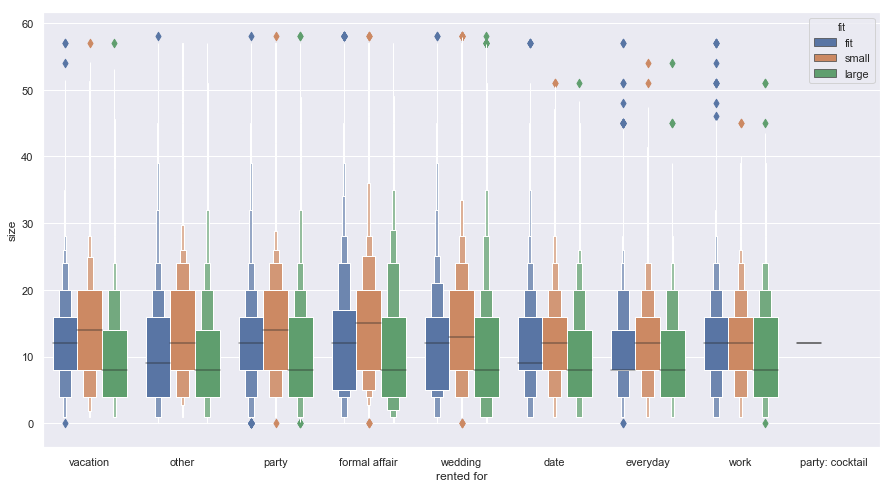

In [60]:
plt.rcParams["figure.figsize"] = (15,8)
ax = sns.boxenplot(x="rented for", y="size",hue="fit", data=df_rent)

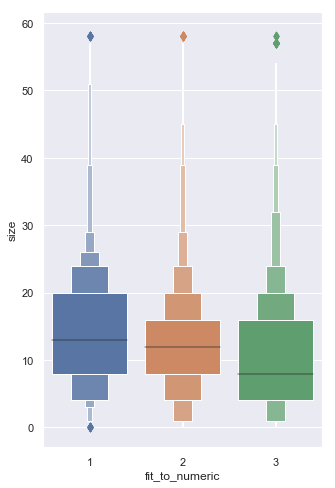

In [61]:
plt.rcParams["figure.figsize"] = (5,8)
ax = sns.boxenplot(x="fit_to_numeric", y="size", data=df_rent)

#### 6. Below represents the relational spread of the fit with respect to the ratings given by the customers to the products. Majority of the items have recieved positive ratings

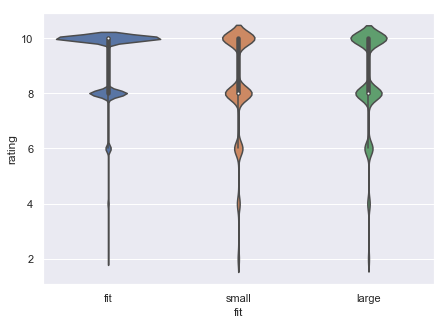

In [62]:
plt.rcParams["figure.figsize"] = (7,5)
ax = sns.violinplot(x="fit", y="rating", data=df_rent)

#### Distribution of Size

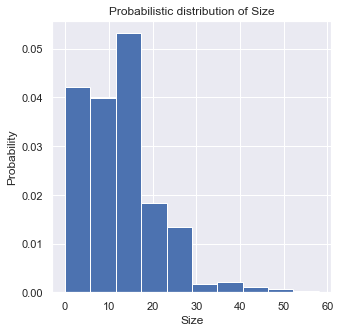

In [63]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(df_rent['size'], density=1, bins=10)
plt.xlabel('Size')
plt.ylabel('Probability')
plt.title('Probabilistic distribution of Size')
plt.show()

### Pie chart representation of Fit

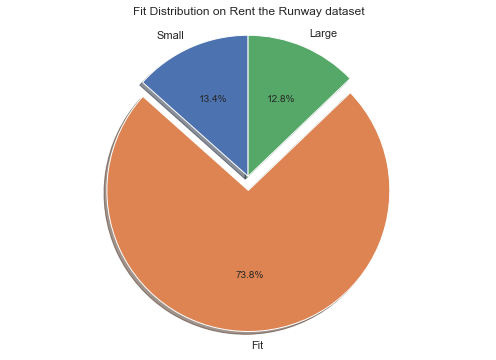

In [64]:
lenSmall = len(df_rent[df_rent['fit'] == 'small'])
lenFit = len(df_rent[df_rent['fit'] == 'fit'])
lenLarge = len(df_rent[df_rent['fit'] == 'large'])

labels = ['Small', 'Fit', 'Large']
sizes = [lenSmall, lenFit, lenLarge]
plt.rcParams["figure.figsize"] = (7,5)
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Fit Distribution on Rent the Runway dataset')
plt.show()

### REFERENCES

https://seaborn.pydata.org/index.html

https://matplotlib.org/

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9